<a href="https://colab.research.google.com/github/anandkgupt/Statistics-Lab/blob/main/Assignment_Statistics_Advance_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistics Part 2:

1 What is hypothesis testing in statistics
 Hypothesis testing is a statistical method used to make decisions or inferences about population parameters based on sample data. It involves testing an assumption (hypothesis) to determine its validity.
2 What is the null hypothesis, and how does it differ from the alternative hypothesis
Null Hypothesis (H₀): A default statement that there is no effect or difference.


Alternative Hypothesis (H₁ or Ha): Contradicts the null, stating there is an effect or difference.
 They are mutually exclusive; rejecting one implies support for the other.



3 What is the significance level in hypothesis testing, and why is it important
 The significance level (α) is the probability of rejecting the null hypothesis when it is true. Common values are 0.05 or 0.01. It sets the threshold for determining statistical significance and controlling Type 1 errors.

4 What does a P-value represent in hypothesis testing
 A P-value indicates the probability of obtaining test results at least as extreme as the observed results, assuming the null hypothesis is true.

5 How do you interpret the P-value in hypothesis testing
P ≤ α: Reject the null hypothesis (evidence is statistically significant).


P > α: Fail to reject the null hypothesis (not statistically significant).



6 What are Type 1 and Type 2 errors in hypothesis testing
Type 1 Error (α): Rejecting a true null hypothesis (false positive).


Type 2 Error (β): Failing to reject a false null hypothesis (false negative).



7 What is the difference between a one-tailed and a two-tailed test in hypothesis testing
One-tailed test: Tests for an effect in one direction (greater than or less than).


Two-tailed test: Tests for any difference (not equal to), regardless of direction.



8 What is the Z-test, and when is it used in hypothesis testing
 A Z-test is used to compare sample and population means when the population variance is known and the sample size is large (n ≥ 30), assuming normality.

9 How do you calculate the Z-score, and what does it represent in hypothesis testing
 Z = (X̄ - μ) / (σ/√n)
 It shows how many standard deviations the sample mean (X̄) is from the population mean (μ). It helps determine the likelihood of the sample result under the null hypothesis.

10 What is the T-distribution, and when should it be used instead of the normal distribution
 The T-distribution is used instead of the normal distribution when the sample size is small (n < 30) and the population standard deviation is unknown. It accounts for extra uncertainty.

11 What is the difference between a Z-test and a T-test
Z-test: Used when population standard deviation is known and sample size is large.


T-test: Used when population standard deviation is unknown and sample size is small.



12 What is the T-test, and how is it used in hypothesis testing
 A T-test assesses whether the means of one or two groups are statistically different. Types include:
One-sample T-test


Independent two-sample T-test


Paired sample T-test



13 What is the relationship between Z-test and T-test in hypothesis testing
 Both tests evaluate mean differences, but:
Z-test is for known variance and large samples.


T-test is for unknown variance and small samples.
 As sample size increases, the T-distribution approaches the normal distribution.



14 What is a confidence interval, and how is it used to interpret statistical results
 A confidence interval estimates a population parameter within a range. For example, a 95% CI means there's a 95% chance the interval contains the true mean.

15 What is the margin of error, and how does it affect the confidence interval
 The margin of error is the amount added and subtracted from the sample estimate to create the confidence interval. A larger margin means a wider, more conservative interval.

16 How is Bayes' Theorem used in statistics, and what is its significance
 Bayes’ Theorem updates the probability of a hypothesis based on new evidence. It's significant in decision-making under uncertainty and in Bayesian statistics.

17 What is the Chi-square distribution, and when is it used
 The Chi-square distribution is used in tests of independence and goodness of fit, especially with categorical data.

18 What is the Chi-square goodness of fit test, and how is it applied
 It tests whether observed categorical frequencies differ from expected frequencies. If the Chi-square statistic is large enough, we reject the null that the observed matches expected.

19 What is the F-distribution, and when is it used in hypothesis testing
 The F-distribution is used to compare two variances or in ANOVA tests. It is right-skewed and depends on two degrees of freedom.

20 What is an ANOVA test, and what are its assumptions
 ANOVA (Analysis of Variance) tests whether three or more group means differ. Assumptions:
Independence of observations


Normal distribution


Homogeneity of variances


21 What are the different types of ANOVA tests
One-way ANOVA: One factor


Two-way ANOVA: Two factors


Repeated measures ANOVA: Same subjects across conditions


22 What is the F-test, and how does it relate to hypothesis testing?
 An F-test compares variances or group means (via ANOVA). It helps test whether the explained variance is significantly greater than the unexplained variance.



**Practical** All Qs

In [3]:
#Perform a Z-test for comparing a sample mean to a known population mean
from scipy.stats import norm
import numpy as np

# Sample data
sample = np.array([52, 55, 50, 53, 54, 51, 49, 56, 52, 50])
pop_mean = 50
pop_std = 3  # Known population std dev

# Z-test
sample_mean = np.mean(sample)
n = len(sample)
z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed

print(f"Z-score: {z_score:.3f}, P-value: {p_value:.3f}")


Z-score: 2.319, P-value: 0.020


In [4]:
#Simulate random data and calculate P-value

from scipy.stats import ttest_1samp
import numpy as np

data = np.random.normal(loc=5.0, scale=1.5, size=100)
t_stat, p_value = ttest_1samp(data, popmean=5.0)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-statistic: -0.720, P-value: 0.473


In [5]:
#Implement a one-sample Z-test
def one_sample_z_test(sample, pop_mean, pop_std):
    n = len(sample)
    sample_mean = np.mean(sample)
    z = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
    p = 2 * (1 - norm.cdf(abs(z)))
    return z, p

sample_data = np.random.normal(52, 5, 30)
z_score, p_value = one_sample_z_test(sample_data, 50, 5)
print(f"Z-score: {z_score:.2f}, P-value: {p_value:.3f}")

Z-score: 2.94, P-value: 0.003


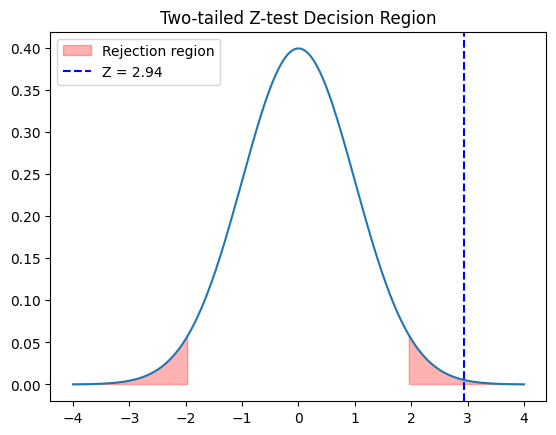

In [6]:
#Two-tailed Z-test and visualize the decision region

import matplotlib.pyplot as plt

z = z_score  # from the previous Z-test
alpha = 0.05
z_critical = norm.ppf(1 - alpha/2)

x = np.linspace(-4, 4, 300)
y = norm.pdf(x)

plt.plot(x, y)
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3, label='Rejection region')
plt.axvline(z, color='blue', linestyle='--', label=f'Z = {z:.2f}')
plt.legend()
plt.title('Two-tailed Z-test Decision Region')
plt.show()

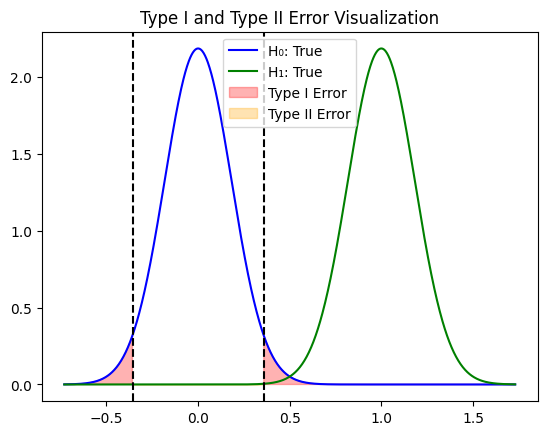

In [7]:
#Function to visualize Type 1 and Type 2 errors

def visualize_errors(mu0=0, mu1=1, sigma=1, alpha=0.05, n=30):
    from scipy.stats import norm
    import matplotlib.pyplot as plt

    se = sigma / np.sqrt(n)
    z_alpha = norm.ppf(1 - alpha / 2)
    crit_left = mu0 - z_alpha * se
    crit_right = mu0 + z_alpha * se

    x = np.linspace(mu0 - 4*se, mu1 + 4*se, 1000)
    y0 = norm.pdf(x, mu0, se)
    y1 = norm.pdf(x, mu1, se)

    plt.plot(x, y0, label='H₀: True', color='blue')
    plt.plot(x, y1, label='H₁: True', color='green')
    plt.fill_between(x, y0, where=(x < crit_left) | (x > crit_right), color='red', alpha=0.3, label='Type I Error')
    plt.fill_between(x, y1, where=(x > crit_left) & (x < crit_right), color='orange', alpha=0.3, label='Type II Error')
    plt.axvline(crit_left, color='black', linestyle='--')
    plt.axvline(crit_right, color='black', linestyle='--')
    plt.legend()
    plt.title('Type I and Type II Error Visualization')
    plt.show()

visualize_errors()

In [8]:
#Independent T-test and interpret results

from scipy.stats import ttest_ind

group1 = np.random.normal(100, 15, 50)
group2 = np.random.normal(105, 15, 50)

t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}")

T-statistic: -3.04, P-value: 0.003


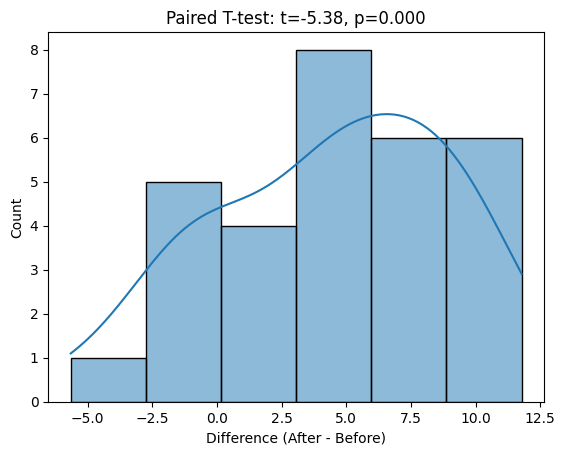

In [9]:
#Paired sample T-test with visualization

from scipy.stats import ttest_rel
import seaborn as sns

before = np.random.normal(90, 10, 30)
after = before + np.random.normal(5, 5, 30)

t_stat, p_value = ttest_rel(before, after)

sns.histplot(after - before, kde=True)
plt.title(f'Paired T-test: t={t_stat:.2f}, p={p_value:.3f}')
plt.xlabel('Difference (After - Before)')
plt.show()

In [10]:
#Simulate data and compare Z-test vs T-test

from scipy.stats import ttest_1samp

data = np.random.normal(50, 10, 25)
pop_mean = 50
pop_std = 10

# Z-test
z_score = (np.mean(data) - pop_mean) / (pop_std / np.sqrt(len(data)))
z_p = 2 * (1 - norm.cdf(abs(z_score)))

# T-test
t_stat, t_p = ttest_1samp(data, pop_mean)

print(f"Z-test: Z = {z_score:.2f}, P = {z_p:.3f}")
print(f"T-test: t = {t_stat:.2f}, P = {t_p:.3f}")

Z-test: Z = 1.27, P = 0.204
T-test: t = 1.95, P = 0.063


In [11]:
#Confidence interval calculator for sample mean

from scipy.stats import t

def confidence_interval(sample, confidence=0.95):
    n = len(sample)
    mean = np.mean(sample)
    sem = np.std(sample, ddof=1) / np.sqrt(n)
    t_crit = t.ppf((1 + confidence) / 2, df=n-1)
    margin = t_crit * sem
    return mean - margin, mean + margin

sample = np.random.normal(70, 10, 25)
ci = confidence_interval(sample)
print(f"95% Confidence Interval: {ci}")


95% Confidence Interval: (np.float64(65.8661014017353), np.float64(73.87896617468925))


In [12]:
#ED Calculate Margin of Error for a Given Confidence Level

from scipy.stats import t
import numpy as np

def margin_of_error(sample, confidence=0.95):
    n = len(sample)
    sem = np.std(sample, ddof=1) / np.sqrt(n)
    t_crit = t.ppf((1 + confidence) / 2, df=n-1)
    return t_crit * sem

sample = np.random.normal(50, 10, 30)
moe = margin_of_error(sample)
print(f"Margin of Error: {moe:.2f}")

Margin of Error: 3.65


In [13]:
#Bayesian Inference with Bayes' Theorem

def bayes_theorem(prior_A, likelihood_B_given_A, prob_B):
    return (likelihood_B_given_A * prior_A) / prob_B

# Example: Medical test
P_D = 0.01        # Prior: has disease
P_Pos_D = 0.99    # Likelihood: test positive if diseased
P_Pos = 0.05      # Overall probability of a positive result

P_D_Pos = bayes_theorem(P_D, P_Pos_D, P_Pos)
print(f"Posterior Probability P(Disease|Positive): {P_D_Pos:.4f}")

Posterior Probability P(Disease|Positive): 0.1980


In [14]:
#Chi-square Test for Independence

import pandas as pd
from scipy.stats import chi2_contingency

# Example contingency table
data = [[20, 15], [30, 35]]
chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")

Chi2 = 0.70, p = 0.402, dof = 1


In [15]:
#Calculate Expected Frequencies for Chi-square Test

obs = np.array([[10, 20], [20, 30]])
chi2, p, dof, expected = chi2_contingency(obs)
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[11.25 18.75]
 [18.75 31.25]]


In [16]:
#Goodness-of-Fit Test

from scipy.stats import chisquare

observed = [18, 22, 20, 40]
expected = [25, 25, 25, 25]
chi2, p = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}")

Chi2 = 12.32, p = 0.006


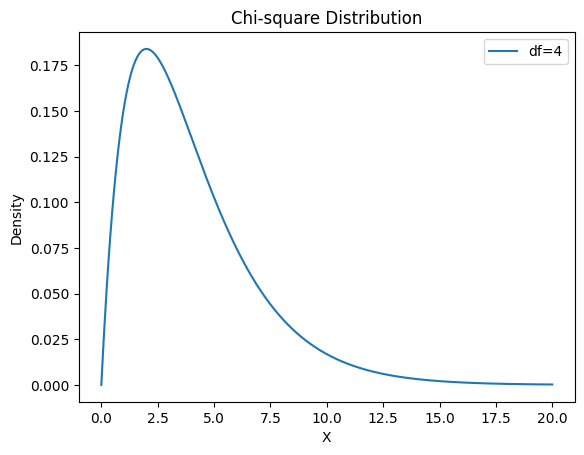

In [17]:
#Simulate and Visualize Chi-square Distribution

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

df = 4
x = np.linspace(0, 20, 500)
y = chi2.pdf(x, df)

plt.plot(x, y, label=f'df={df}')
plt.title('Chi-square Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()

In [18]:
#F-test for Comparing Variances

sample1 = np.random.normal(100, 10, 30)
sample2 = np.random.normal(100, 15, 30)

f = np.var(sample1, ddof=1) / np.var(sample2, ddof=1)
print(f"F-statistic: {f:.2f}")

F-statistic: 0.60


In [19]:
#ANOVA Test (One-Way)

from scipy.stats import f_oneway

group1 = np.random.normal(50, 5, 30)
group2 = np.random.normal(52, 5, 30)
group3 = np.random.normal(48, 5, 30)

f_stat, p = f_oneway(group1, group2, group3)
print(f"F = {f_stat:.2f}, p = {p:.3f}")

F = 2.03, p = 0.137


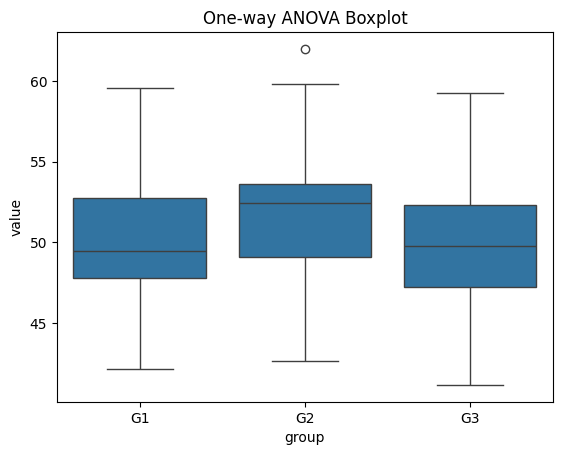

In [20]:
#One-way ANOVA with Visualization

import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    'value': np.concatenate([group1, group2, group3]),
    'group': ['G1']*30 + ['G2']*30 + ['G3']*30
})
sns.boxplot(x='group', y='value', data=df)
plt.title('One-way ANOVA Boxplot')
plt.show()

In [21]:
#Check Assumptions for ANOVA

from scipy.stats import shapiro, levene

# Normality check
print("Normality Test (Shapiro):")
for i, group in enumerate([group1, group2, group3], 1):
    stat, p = shapiro(group)
    print(f"Group {i}: p = {p:.3f}")

# Equal variance check
stat, p = levene(group1, group2, group3)
print(f"\nLevene’s Test for Equal Variances: p = {p:.3f}")

Normality Test (Shapiro):
Group 1: p = 0.047
Group 2: p = 0.228
Group 3: p = 0.958

Levene’s Test for Equal Variances: p = 0.852


In [22]:
#Two-Way ANOVA with Visualization

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Simulate 2-factor data
df = pd.DataFrame({
    'A': np.repeat(['Low', 'High'], 30),
    'B': ['X']*15 + ['Y']*15 + ['X']*15 + ['Y']*15,
    'score': np.random.normal(50, 5, 60)
})
model = ols('score ~ C(A) * C(B)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq    df         F    PR(>F)
C(A)         90.636157   1.0  3.831669  0.055284
C(B)          1.641134   1.0  0.069379  0.793209
C(A):C(B)     9.868795   1.0  0.417206  0.520973
Residual   1324.651298  56.0       NaN       NaN


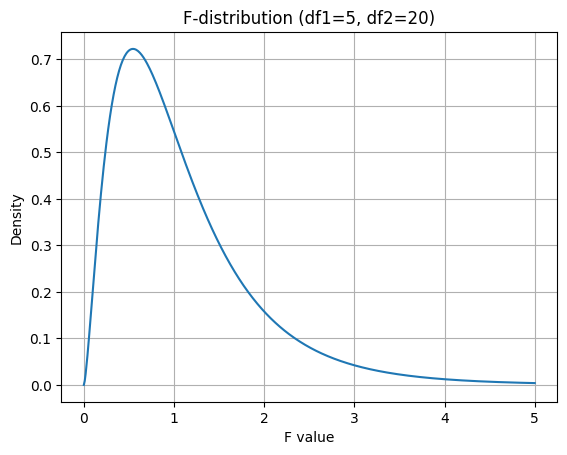

In [23]:
#Visualize F-distribution

from scipy.stats import f

x = np.linspace(0, 5, 500)
y = f.pdf(x, dfn=5, dfd=20)

plt.plot(x, y)
plt.title('F-distribution (df1=5, df2=20)')
plt.xlabel('F value')
plt.ylabel('Density')
plt.grid()
plt.show()

In [24]:
#One-way ANOVA with Boxplot

sns.boxplot(x='group', y='value', data=df)
plt.title('Group Mean Comparison with ANOVA')
plt.show()

ValueError: Could not interpret value `group` for `x`. An entry with this name does not appear in `data`.

In [25]:
#Simulate Data and Hypothesis Test for Mean

data = np.random.normal(100, 10, 40)
t_stat, p_val = ttest_1samp(data, popmean=100)
print(f"T = {t_stat:.2f}, P = {p_val:.3f}")

T = -0.24, P = 0.812


In [26]:
#Hypothesis Test for Population Variance

data = np.random.normal(50, 8, 30)
sample_var = np.var(data, ddof=1)
pop_var = 64  # known population variance
chi2_stat = (len(data) - 1) * sample_var / pop_var
df = len(data) - 1

p_val = 2 * min(chi2.cdf(chi2_stat, df), 1 - chi2.cdf(chi2_stat, df))
print(f"Chi2 = {chi2_stat:.2f}, P = {p_val:.3f}")

Chi2 = 47.02, P = 0.037


In [27]:
#Z-test for Comparing Proportions

from statsmodels.stats.proportion import proportions_ztest

success = np.array([45, 30])
nobs = np.array([100, 90])
z_stat, p_val = proportions_ztest(success, nobs)
print(f"Z = {z_stat:.2f}, P = {p_val:.3f}")

Z = 1.64, P = 0.100


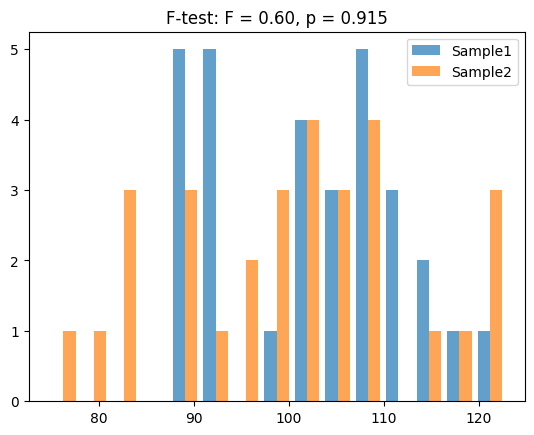

In [28]:
#F-test: Compare Variances and Visualize

var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)
f_stat = var1 / var2

df1, df2 = len(sample1)-1, len(sample2)-1
p_val = 1 - f.cdf(f_stat, df1, df2)

plt.hist([sample1, sample2], bins=15, label=["Sample1", "Sample2"], alpha=0.7)
plt.legend()
plt.title(f'F-test: F = {f_stat:.2f}, p = {p_val:.3f}')
plt.show()

In [29]:
#Chi-square Goodness of Fit with Simulated Data

obs = np.random.randint(10, 50, 4)
exp = np.array([25, 25, 25, 25])
chi2_stat, p_val = chisquare(obs, f_exp=exp)
print(f"Chi2 = {chi2_stat:.2f}, p = {p_val:.3f}")

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.02040816326530612